#### Vanilla VAE

Demonstrates MNIST reconstruction and hidden variable representation.

In [1]:
%pylab inline
import matplotlib.pyplot as plt
from vanilla_vae import *

/Users/wellecks/own_files/env/minpy_dev/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


#### MNIST Reconstruction

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets('data')
data_dim = data.train.images.shape[1]

enc_h = 128
enc_z = 64
dec_h = 128
max_iters = 5000
batch_size = 100
learning_rate = 0.01

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [5]:
tf.reset_default_graph()

In [6]:
x, e = inputs(data_dim, enc_z)
mu, log_var, z = encoder(x, e, data_dim, enc_h, enc_z)
out_op, out_mu, out_log_var = decoder(z, data_dim, dec_h, enc_z)
loss_op = make_loss(out_mu, x, log_var, mu, out_log_var)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

In [7]:
x_test, _ = data.test.next_batch(1)
recons = []

for i in xrange(max_iters):
    x_, y_ = data.train.next_batch(batch_size)
    l = train_step(sess, x_, train_op, loss_op, x, e, enc_z)
    if i % 1000 == 0:
        print('iter: %d\tloss: %.2f' % (i, l))
        recons.append(reconstruct(sess, x_test, out_op, x, e, enc_z)[0])

iter: 0	loss: 565.93
iter: 1000	loss: 126.31
iter: 2000	loss: 132.00
iter: 3000	loss: 123.99
iter: 4000	loss: 121.56


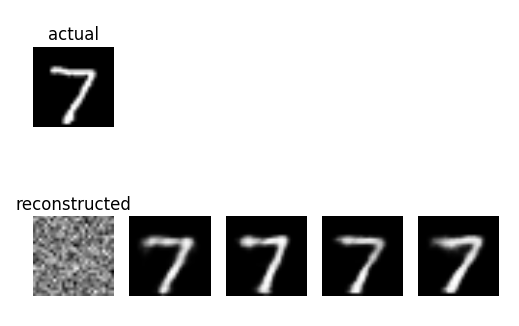

In [8]:
actual = x_test[0]
fig, axs = plt.subplots(2, len(recons))
for i, recon in enumerate(recons):
    axs[0, 0].imshow(actual.reshape(28, 28), cmap='gray')
    axs[1, i].imshow(recon.reshape(28, 28), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].axis('off')
axs[0, 0].set_title('actual')
axs[1, 0].set_title('reconstructed');

#### Image reconstruction widget

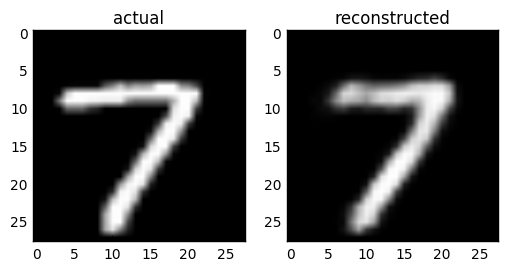

In [9]:
from ipywidgets import interact
n = 1000
images = data.test.next_batch(n)[0]
reconstructed = reconstruct(sess, images, out_op, x, e, enc_z)[0]

def browse(i):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(images[i].reshape(28, 28), cmap='gray')
    axs[1].imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    axs[0].set_title('actual')
    axs[1].set_title('reconstructed')
    plt.show()

interact(browse, i=(0, n-1));

#### Hidden Variable visualization

Train with 2d latent space

In [12]:
tf.reset_default_graph()

In [13]:
data = input_data.read_data_sets('data')
data_dim = data.train.images.shape[1]

enc_h = 128
enc_z = 2
dec_h = 128
max_iters = 10000
batch_size = 100
learning_rate = 0.001

x, e = inputs(data_dim, enc_z)
mu, log_var, z = encoder(x, e, data_dim, enc_h, enc_z)
out_op, out_mu, out_log_var = decoder(z, data_dim, dec_h, enc_z)
loss_op = make_loss(out_mu, x, log_var, mu, out_log_var)
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [14]:
for i in xrange(max_iters):
    x_, y_ = data.train.next_batch(batch_size)
    l = train_step(sess, x_, train_op, loss_op, x, e, enc_z)
    if i % 1000 == 0:
        print('iter: %d\tloss: %.2f' % (i, l))

iter: 0	loss: 545.94
iter: 1000	loss: 175.96
iter: 2000	loss: 174.88
iter: 3000	loss: 171.78
iter: 4000	loss: 159.05
iter: 5000	loss: 160.25
iter: 6000	loss: 163.72
iter: 7000	loss: 160.33
iter: 8000	loss: 150.31
iter: 9000	loss: 155.87


Visualizing learned representation space

In [15]:
x_, y_ = data.train.next_batch(5000)
e_ = np.random.normal(size=(x_.shape[0], enc_z))
zs = sess.run(z, feed_dict={x: x_, e: e_})

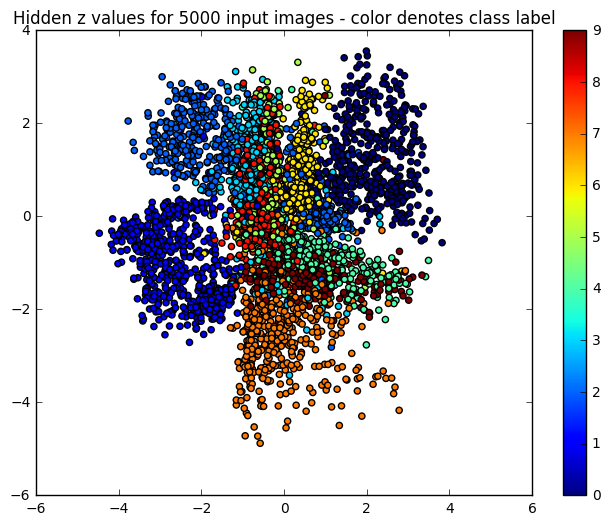

In [16]:
fig = plt.figure(figsize=(8, 6));
plt.scatter(zs[:, 0], zs[:, 1], c=y_)
plt.colorbar();
plt.title('Hidden z values for %d input images - color denotes class label' % x_.shape[0])
plt.show();

Decode images with latent points from across a 2d grid

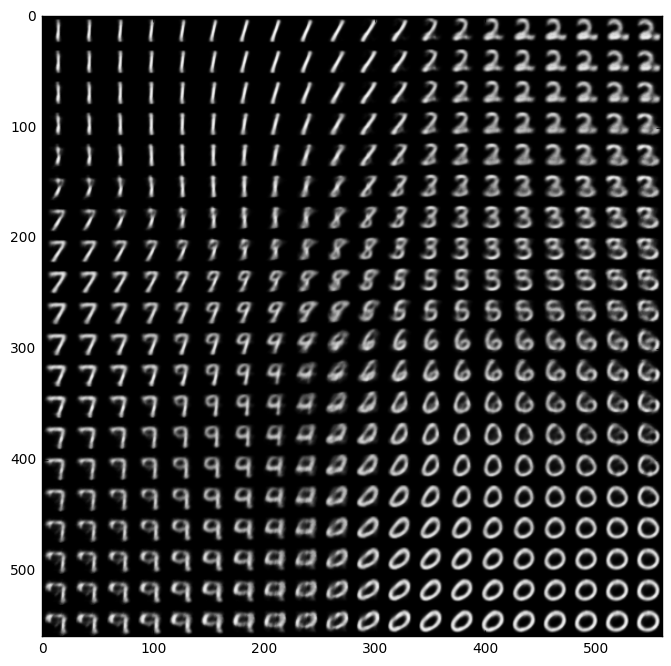

In [18]:
num_x, num_y = 20, 20
x_dom = np.linspace(-3, 3, num_x)
y_dom = np.linspace(-3, 3, num_y)

canvas = np.empty((28*num_x, 28*num_y))
for i, xi in enumerate(x_dom):
    for j, yj in enumerate(y_dom):
        x_hat = sess.run(out_op, feed_dict={z: np.array([[xi, yj]])})
        canvas[28*i:28*(i+1), 28*j:28*(j+1)] = x_hat.reshape(28, 28)

plt.figure(figsize=(8, 8))
plt.imshow(canvas, cmap='gray');